In [30]:
import sys
sys.path.append('../utils')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry
import ct_tools
import open3d as o3d
from open3d import io, visualization

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob
import pydicom
import functools
import mcubes


In [31]:
#image = meshy.read_dicom('../series-00000/', unscaled = True)
image = ct_tools.read_dicom('../series-00000/', HU = True, crop = 450, axis = 0)



100%|██████████| 361/361 [00:17<00:00, 21.06it/s]


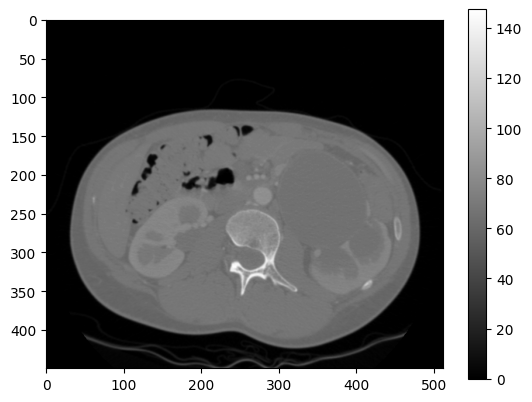

In [32]:
plt.imshow(image[:, :, -180])

plt.colorbar()
plt.gray()

In [33]:
fg_mask = ct_tools.make_fg_mask(image, image.shape[2], use_kmeans = False, fg_threshold = 57)



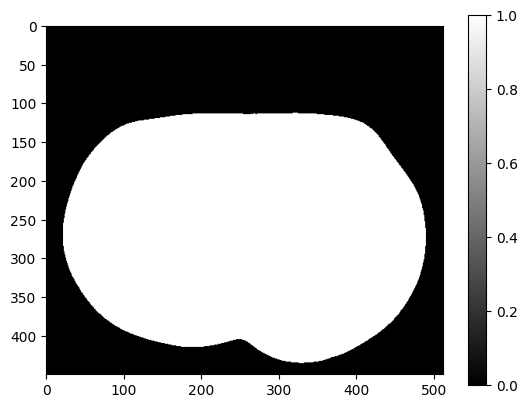

In [34]:
plt.imshow(fg_mask[:, :, 95])
plt.colorbar()
plt.gray()

In [35]:
vertices, triangles = ct_tools.make_surface_mesh(fg_mask, './body_surface_smoothed.obj')


In [53]:
surface_mesh = io.read_triangle_mesh("body_surface_smoothed.obj")
surface_mesh = o3d.t.geometry.TriangleMesh.from_legacy(surface_mesh)
print(type(surface_mesh))
print(dir(surface_mesh))
surface_mesh.compute_vertex_normals()

vertices = surface_mesh.vertex.positions
normals = surface_mesh.vertex.normals

vertex_num = 55
theta = 2

# transducers = [transducer.Planewave(max_frequency=1e6,
#                                     elements = 32, 
#                                     width = 20e-3,
#                                     height =  20e-3,
#                                     sensor_sampling_scheme = 'not_centroid', 
#                                     sweep = np.pi/3,
#                                     ray_num = 32, 
#                                     imaging_ndims = 2,
#                                     focus_elevation = 20e-3,
#                                     ) for i in range(1)]

# for t in transducers:
#     t.make_sensor_coords(test_phantom.baseline[0])

# test_set = transducer_set.TransducerSet(transducers, seed=8888)
# test_transducer_set.assign_pose(0, geometry.Transform(-theta*normals[vertex_num], vertices[vertex_num]))

<class 'open3d.cpu.pybind.t.geometry.TriangleMesh'>
['__class__', '__copy__', '__deepcopy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'bake_triangle_attr_textures', 'bake_vertex_attr_textures', 'boolean_difference', 'boolean_intersection', 'boolean_union', 'clear', 'clip_plane', 'clone', 'compute_convex_hull', 'compute_triangle_normals', 'compute_uvatlas', 'compute_vertex_normals', 'cpu', 'create_arrow', 'create_box', 'create_cone', 'create_coordinate_frame', 'create_cylinder', 'create_icosahedron', 'create_mobius', 'create_octahedron', 'create_sphere', 'create_tetrahedron', 'create_text', 'create_torus', 'cuda', 'device', 'extrude_linear', 'extrude_rotation', 'fill_holes', 'from_legacy', 'get_a

In [48]:
# begin snap-to-surface algo here

def snap_to_surface(point, surface):

    if isinstance(surface, o3d.cpu.pybind.geometry.TriangleMesh):
        surface = o3d.t.geometry.TriangleMesh.from_legacy(surface)
    scene = o3d.t.geometry.RaycastingScene()
    _ = scene.add_triangles(surface)
    query_pt = o3d.core.Tensor([point], dtype=o3d.core.Dtype.Float32)

    return scene.compute_closest_points(query_pt), surface

closest_pt, surface = snap_to_surface([400, 400, 181], surface_mesh)
print(closest_pt)

{'primitive_normals': [[0.8684854 0.49235773 0.05759299]]
Tensor[shape={1, 3}, stride={3, 1}, Float32, CPU:0, 0x13a059260], 'points': [[399.91782 399.9534 180.99455]]
Tensor[shape={1, 3}, stride={3, 1}, Float32, CPU:0, 0x13a04f9b0], 'primitive_uvs': [[0.7542669 0.24028216]]
Tensor[shape={1, 2}, stride={2, 1}, Float32, CPU:0, 0x13a074f70], 'primitive_ids': [957615]
Tensor[shape={1}, stride={1}, UInt32, CPU:0, 0x13a026cc0], 'geometry_ids': [0]
Tensor[shape={1}, stride={1}, UInt32, CPU:0, 0x13a085450]}


In [ ]:
# begin inverse field of view code here 



In [ ]:
# use density from tissue mask to do rudimentary FEM? 